<a href="https://colab.research.google.com/github/melodyyu1112/Machine_learning_416/blob/master/A1_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 House Prices

### Due: Tuesday, July 2nd, 11:59 pm on Gradescope.

In this assignment we'll practice working with `pandas` `DataFrames` and train a linear regression model to predict house prices.



> Copyright ©2019 Emily Fox and Hunter Schafer.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Summer Quarter 2019 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.

In [0]:
# This cell is necessary only if you are running on Google Colab

import requests

def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

save_file('https://homes.cs.washington.edu/~hschafer/cse416/a1/home_data.csv',
          'home_data.csv')

In [0]:
# Conventionally people rename the pandas import to pd for brevity
import pandas as pd

In [0]:
sales = pd.read_csv('home_data.csv') 
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
### Q1) Exploring the data.
This question asks you to explore the dataset we will be using. Answer these three questions

* How many houses do we have in our data set? This should correspond to the number of rows in the dataset.
* Which column are we trying to predict given the other features (i.e. what's our output `y`)? 
* How many inputs do we have in total in the data set (i.e. what is the size of our input `x`)?

You do not need to write code to answer the second bullet, but the others should be answered in the cells below. 

*Hint:* You can use `len()` to get the length of anything in python. Note that when you use it on a DataFrame, it will give you the number of rows, not columns.

<div class="alert alert-block alert-success">
<b>Options:</b> Enter one of these options on Gradescope.
<ul>
    <li>21613 houses, price, 20</li>
    <li>21613 houses, bedrooms, 21</li>
    <li>22014 houses, price, 21</li>
    <li>22014 houses, bedrooms, 20</li>
    <li>21613 houses, price, 21</li>
</ul>
</div>


In [0]:
# TODO: How many houses are there?

In [0]:
len(sales)

21613

In [0]:
# TODO: How many inputs are there?

In [0]:
len(sales.columns)

21

---
### Q2) What is the average price of houses with 3 bedrooms?
**To solve this problem, you should write code that prints out the average price for every number of bedrooms**, but we only want you to report the number for 3 bedrooms in Gradescope. 

To do this, you will want to do the following steps
* Find the maximum number of bedrooms in the dataset
* Make a loop that goes from 0 to that number
* For each number of bedrooms, compute the average price of the houses with that number of bedrooms. Print out both the number of bedrooms and the average price of houses with that number of bedrooms.

It's expected there will be some number of bedrooms between 0 and the max that don't have any houses. If you have `pandas` compute the mean, it will return the value `nan` which means "Not a Number". You don't have to handle this case specially, printing `nan` is fine. Additionally, there may be some data entry errors from the original dataset so you might see some results that look a bit odd (this is expected and happens ALL the time with real-world datasets).

<div class="alert alert-block alert-success">
<ul>
    <li><code>nan</code></li>
    <li>466,232</li>

</ul>
</div>

In [0]:
max = sales['bedrooms'].max()

In [0]:
# TODO: Write code to print out all the average prices for each number of bedrooms

In [0]:
sales[sales['bedrooms'] == 2]['price'].mean()
print(sales[sales['bedrooms'] == 33]['price'].mean())
  

for i in range(max):
  print(i)
  print(sales[sales['bedrooms'] == i]['price'].mean())

  


640000.0


TypeError: ignored

In [0]:
sales[sales['bedrooms'] == 3].mean()

id               4.535884e+09
price            4.662321e+05
bedrooms         3.000000e+00
bathrooms        1.968394e+00
sqft_living      1.805837e+03
sqft_lot         1.441479e+04
floors           1.449410e+00
waterfront       6.514658e-03
view             1.878054e-01
condition        3.415513e+00
grade            7.472516e+00
sqft_above       1.584442e+03
sqft_basement    2.213950e+02
yr_built         1.971813e+03
yr_renovated     7.600143e+01
zipcode          9.807648e+04
lat              4.755148e+01
long            -1.222133e+02
sqft_living15    1.835444e+03
sqft_lot15       1.280934e+04
dtype: float64

---
### Q3) What fraction of the properties are have `sqft_living` between 2000-4000?
<div class="alert alert-block alert-success">
<ul>
    <li>0.3 - 0.4</li>

</ul>
</div>
 

In [0]:
# TODO

In [0]:
len(sales[(sales['sqft_living'] >= 2000) & (sales['sqft_living'] <= 4000)])/len(sales)

0.4266413732475825

---
## Training a Linear Regression Model.

We will now train a linear regression model to make useful predictions. Work through the steps below and then answer the following questions. Even though a lot of the code is pre-written, you should understand what it is doing! You may be asked to write some of this code on future assignments.

First we split the data into a training set and a test set.

In [0]:
from sklearn.model_selection import train_test_split 
train_data, test_data = train_test_split(sales, test_size = 0.2, random_state=0)  # random_state makes everything deterministic

Lets plot some of the data to get a sense of what we are dealing with

Text(0, 0.5, 'Price')

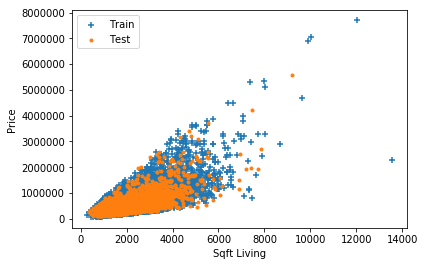

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot primarily takes 
#plt.scatter(sales['sqft_living'], sales['price'], marker='.')
plt.scatter(train_data['sqft_living'], train_data['price'], marker='+', label='Train')
plt.scatter(test_data['sqft_living'], test_data['price'], marker='.', label='Test')

# Code to customize the axis labels
plt.legend()
plt.xlabel('Sqft Living')
plt.ylabel('Price')

For this problem, we will look at using two sets of features derived from the data inputs. The basic set of features only contains a few data inputs while the advanced features contain them and more.

In [0]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [0]:
advanced_features = basic_features + [
    'condition',      # condition of the house
    'grade',          # measure of qality of construction
    'waterfront',     # waterfront property 
    'view',           # type of view
    'sqft_above',     # square feet above ground
    'sqft_basement',  # square feet in basementab
    'yr_built',       # the year built
    'yr_renovated',   # the year renovated
    'lat',            # the longitude of the parcel
    'long',           # the latitide of the parcel
    'sqft_living15',  # average sq.ft. of 15 nearest neighbors 
    'sqft_lot15',     # average lot size of 15 nearest neighbors 
]

---
<div class="alert alert-block alert-info">
    <b>Note:</b> You have to do something for this section for the model training, but there is no answer to submit on Gradescope!
</div>

In the following cell, you should train two linear regression models
* The first should be saved in a variable called `basic_model` that only uses the basic features
* The seconod should be saved in a variable called `advanced_model` that uses the advanced features

Look at the [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function in the API documentation to figure out how to use it. You will also need to import the `LinearRegression` class.

Notice that our goal is to eventually make a prediction of how the model will do in the future. You should keep this in mind when deciding which datasets to use where.

In [0]:
# TODO: Write your code here to train the two models

In [0]:
from sklearn.linear_model import LinearRegression


In [0]:
basic_model = LinearRegression().fit(train_data[basic_features], train_data['price'])
advanced_model = LinearRegression().fit(train_data[advanced_features], train_data['price'])

Now, we will evaluate the models' predictions to see how they perform.

---
### Q4) What are your Root Mean Squared Errors (RMSE) on your training data using the basic model and then the advanced model?
Use the models you trained in last section to predict what it thinks the values for the data points should be. You can look at the documentation from the `LinearRegression` model to see how to make predictions. 

The RMSE is another commonly reported metric used for regression models. The RMSE is similar to RSS but is modified slightly to scale the number down. The RMSE is defined as $$RMSE = \sqrt{\frac{1}{n}RSS}$$

where the thing inside the square root is refered to as the Mean Square Error (MSE). You will also need to use the `mean_squared_error` function from sklearn (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)) which you'll have to import as well. 

**Remember, we want you to report the square root of the MSE numbers**. 
<div class="alert alert-block alert-success">
<ul>
    <li>Basic: ~258,527, Advanced ~203,805</li>

</ul>
</div>

In [0]:
# Write your code here

In [0]:
from sklearn.metrics import mean_squared_error
y_pred = basic_model.predict(train_data[basic_features])
y_true = train_data['price']
MSE=mean_squared_error(y_true, y_pred)
RMSE1 = ( MSE)**(1/2)
print(RMSE1)

y_pred = advanced_model.predict(train_data[advanced_features])
y_true = train_data['price']
MSE=mean_squared_error(y_true, y_pred)
RMSE2 = ( MSE)**(1/2)
print(RMSE2)

258524.68484833508
203805.41055523997


---
### Q5) What are your RMSE errors on your test data using the basic model and then the advanced model?
<div class="alert alert-block alert-success">
<ul>
    <li>Basic: ~244,005, Advanced ~190,473</li>
</ul>
</div>

In [0]:
# TODO: Write your code here

In [0]:
from sklearn.metrics import mean_squared_error
y_pred = basic_model.predict(test_data[basic_features])
y_true = test_data['price']
MSE=mean_squared_error(y_true, y_pred)
RMSE1 = (MSE)**(1/2)
print(RMSE1)

y_pred = advanced_model.predict(test_data[advanced_features])
y_true = test_data['price']
MSE=mean_squared_error(y_true, y_pred)
RMSE2 = (MSE)**(1/2)
print(RMSE2)

244004.77443104176
190473.37570967825


---
### Q6.a) Which model would you choose?

<div class="alert alert-block alert-success">
<ul>
    <li>Model with the advanced features</li>
</ul>
</div>

### Q6.b) Why?
<div class="alert alert-block alert-success">
    <li>It has lower test error</li>
   
</ul>
</div>
